[링크] https://radimrehurek.com/gensim/apiref.html


In [0]:
path = '/content/wiki_small800.txt'

from gensim.models import Word2Vec
import gensim
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
corpus = gensim.models.word2vec.Text8Corpus(path)

In [3]:
model = Word2Vec(corpus, min_count=20, size=100, window=2, iter=100, sg=1)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
model.save('w2v_model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 저장된 모델 사용해보기

In [5]:
model = Word2Vec.load('w2v_model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


- similarity() : 두 단어의 유사도 계산
- most_similar() : 가장 유사한 단어를 출력

In [6]:
model.similarity('사람', '인간')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.38716942

In [7]:
model.similarity('배우', '여배우')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5289848

In [8]:
model.most_similar(positive=["디자인"], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('기법', 0.5170047283172607),
 ('그래픽', 0.49782294034957886),
 ('방식', 0.4615093469619751),
 ('개발', 0.44915151596069336),
 ('고급', 0.44464704394340515),
 ('애니메이션', 0.433659166097641),
 ('팜', 0.433339387178421),
 ('기술', 0.43310171365737915),
 ('유닉스', 0.43065181374549866),
 ('연극', 0.42782047390937805)]

most_similar 메서드는 positive 인수와 negative 인수를 사용하여 다음과 같은 단어간 관계도 찾을 수 있다.

> she + (actor - actress) = he

In [10]:
model.most_similar(positive=['개그맨', '여자'], negative= ['남자'], topn=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('개그우먼', 0.5788734555244446)]

In [11]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('남자 여자 주방'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'남자'

In [12]:
model.wv.doesnt_match('연필 지우개 자동차'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'자동차'

## Visualization

- word2vec을 100차원으로 했기 때문에 시각화를 위해서 2차원으로 축소
- 축소할 때 관계를 유지하기 위해 t-SNE로 transform

In [0]:
# [참고] https://woolulu.tistory.com/133
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

path_nanum = "/content/NanumMyeongjo-Bold.ttf"
prop = fm.FontProperties(fname=path_nanum)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


4364
[ 0.23616311  0.5058866  -0.5171377  -0.5050125  -0.06534326 -0.26844224
  0.27139565  0.03965815  0.2518473   0.48679298]


In [0]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
print(df.shape)
print(df.head())

(200, 2)
           x         y
위  -2.658508  2.366599
에서 -1.362685  1.493934
감마  2.880062  6.317019
함수  2.589096  6.558026
의  -2.351562  0.899376


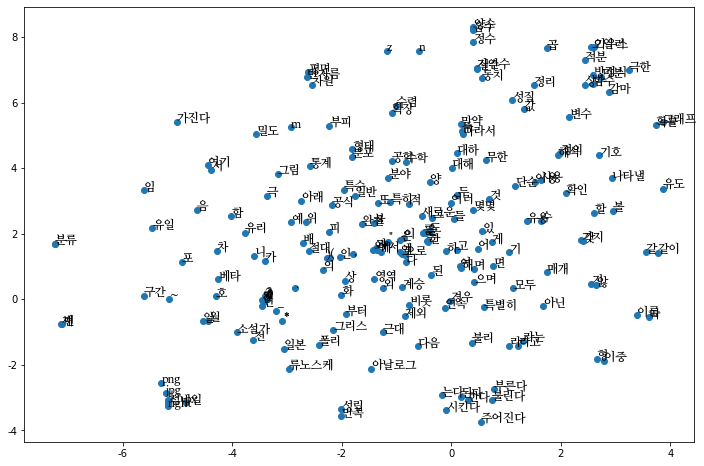

In [0]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=12, fontproperties=prop)
plt.show()